# Final Project Phase 2 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 2 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. <b>Make sure that on every segment of code you write, you include an author tag (see below)</b>. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase I below. You may include additional cleaning functions if you have extra datasets. 


## Downloaded Dataset Requirement



In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

def data_parser1(filename):
    df=pd.read_csv(filename)
    
    del df["Suppress"]
    del df["Note"]
    del df["Percent Excess Lower Estimate"]
    del df["Percent Excess Higher Estimate"]
    del df["Type"]
    del df["Outcome"]
    
    df.replace("","N/A") #replaces empty cells with "N/A"
    df.replace(np.nan,"N/A") #replaces NaN values with "N/A"
    df.replace(',','', regex=True, inplace=True) #removes all commas in order to convert to float
    df['Observed Number'] = df['Observed Number'].astype(float)
    df['Upper Bound Threshold'] = df['Upper Bound Threshold'].astype(float)
    df['Average Expected Count'] = df['Average Expected Count'].astype(float)
    df['Excess Lower Estimate'] = df['Excess Lower Estimate'].astype(float)
    df['Excess Higher Estimate'] = df['Excess Higher Estimate'].astype(float)
    df['Total Excess Lower Estimate in 2020'] = df['Total Excess Lower Estimate in 2020'].astype(float)
    df['Total Excess Higher Estimate in 2020'] = df['Total Excess Higher Estimate in 2020'].astype(float)
    
    AllCauses=df[:10584] #splits data by ALl Causes of Death
    ExceptCOVID=df[10584:21168] #splits data by All Causes of Death except COVID
    
    
    writer=pd.ExcelWriter(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\ExcessDeaths.xlsx')
    AllCauses.to_excel(writer,sheet_name="AllCauses",index=False) 
    ExceptCOVID.to_excel(writer,sheet_name="ExceptCOVID",index=False) 
    writer.save()
    
    pass
  

############ Function Call ############
pprint(data_parser1("Excess_Deaths_Associated_with_COVID-19.csv"))

In [17]:
import pandas as pd
from pprint import pprint

def data_parser2(filename):
    df=pd.read_excel(filename,sheet_name="Table 1")
    df.drop(df.index[[0,1,2,63]], inplace=True)
    df.replace('.......','N/A', inplace=True)
    
    df.rename(columns={'Table 1. Percent Change in Real Gross Domestic Product (GDP) by State and Region, 2019:Q1-2020:Q2':'Region/State','Unnamed: 1':'2019','Unnamed: 2':'2019Q1','Unnamed: 3':'2019Q2','Unnamed: 4':'2019Q3','Unnamed: 5':'2019Q4','Unnamed: 6':'2020Q1','Unnamed: 7':'2020Q2','Unnamed: 8':'2020Q2 Rank'}, inplace=True )
    
    del df["2019"]
    
    df['2019Q1'] = df['2019Q1'].astype(float)
    df['2019Q2'] = df['2019Q2'].astype(float)
    df['2019Q3'] = df['2019Q3'].astype(float)
    df['2019Q4'] = df['2019Q4'].astype(float)
    df['2020Q1'] = df['2020Q1'].astype(float)
    df['2020Q2'] = df['2020Q2'].astype(float)
    
    writer=pd.ExcelWriter(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\StateRGDP%Change.xlsx')
    df.to_excel(writer,index=False) 
    writer.save()
    
    pass


############ Function Call ############
pprint((data_parser2("qgdpstate1020_0.xlsx")))

None


In [18]:
import pandas as pd
from pprint import pprint

def data_parser3(filename):
    df=pd.read_csv(filename)
    df['UNRATE'] = df['UNRATE'].astype(float) #changes all UR to floats
    df.to_excel(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\NationalUR%LF.xlsx',index=False,header=True) #writes df to excel file
    
    pass


############ Function Call ############
pprint((data_parser3("UNRATE.csv")))

None


In [26]:
import pandas as pd
from pprint import pprint

def data_parser4(filename):
    df=pd.read_csv(filename)
    df['GDPC1'] = df['GDPC1'].astype(float) #changes all UR to floats
    df.columns=["Date","RDGP(Billions of $)"] #changes column headers
    df.to_excel(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\NationalRGDP.xlsx',index=False,header=True) #writes df to excel file
    
    pass

  
############ Function Call ############
pprint((data_parser4("GDPC1.csv")))

None


## Web Collection Requirement \#1


In [41]:
import json,requests,re
import pandas as pd
from pprint import pprint

def web_parser1(url):
    r = requests.get(url)
    data = r.json()
    stats=[] #column headers
    for stat in data[0].keys():
        stats.append(stat)
        
    for index,date in enumerate(data):
        if date["date"]==20200227:
            del data[index+1:] #dels all dates before massive increase(outliers) in test and postive cases
        
    for date in data:
        for stat in stats:
            if stat=="date":
                date.pop(stat) #removes"date" column
            if stat=="posNeg":
                date.pop(stat) #removes "posNeg" column 
            if stat=="hash":
                date.pop(stat) #removes "hash" column
            if stat=="hospitalized": 
                date.pop(stat) #removes "hospitalized" column
            if stat=="total":
                date.pop(stat) #removes "total" column
            if stat=="lastModified": #removes"lastModified" column
                date.pop(stat)
            if stat=="states":
                date["states/territories"]=date.pop(stat) #clarifies that stat includes US territories
            if stat=="dateChecked":
                m=re.search(r"(.*?)T00:00:00Z",date[stat])
                if m:
                    f=m.group(1)
                    date[stat]=f #gets rid of the hours:mins:seconds of the date
            if stat=="death":
                date["totaldeaths"]=date.pop(stat) #each one renames the column header
            if stat=="positive":
                date["totalpositivecases"]=date.pop(stat)
            if stat=="negative":
                date["totalnegativecases"]=date.pop(stat)
            if stat=="hospitalizedCumulative":
                date["totalhospitalized"]=date.pop(stat)
            if stat=="inIcuCumulative":
                date["totalinIcu"]=date.pop(stat)
            if stat=="onVentilatorCumulative":
                date["totalonVentilator"]=date.pop(stat)
            if stat=="recovered":
                date["totalrecovered"]=date.pop(stat)
                
    for date in data:
        for key,val in date.items():
            if val==None:
                date[key]=0 #replaces all None values with 0
                
    listoflistvalues=[] #rows of the df
    for date in data:
        dictvalist=[]
        for key,value in date.items():
            dictvalist.append(value)
        listoflistvalues.append(dictvalist)
        
    df=pd.DataFrame(listoflistvalues,columns=data[0].keys()) #creates df
    df.sort_index(axis=1,inplace=True) #sorts df by column headers
    df.to_excel(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\NationalStats.xlsx',index=False,header=True) #writes df to excel file
    
    pass


############ Function Call ############
pprint((web_parser1("https://api.covidtracking.com/v1/us/daily.json")))

None


## Web Collection Requirement #2

In [20]:
import requests,re
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint

def web_parser2(url):
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, "html.parser")
    
    tablehead=soup.find("thead")
    headertag=tablehead.find_all("th")
    headers=[header.text for header in headertag] #list of headers
    del headers[10:]
    
    tablebody=soup.find("tbody")
    statetags=tablebody.find_all("tr")
    statesubtag=[state for state in statetags]
    statestatlist=[]
    for state in statesubtag:
        m=re.findall(r">(.*?)</td>",str(state))
        statestatlist.append(m) #list of lists of states and UR per month
        
    p=re.search(r"<p>(.*?)</p>",str(statesubtag[1])) 
    alaskafeb=p.group(1)
    statestatlist[1].insert(2,alaskafeb) #handles Alaska Feb rate subtag exception
        
    for state in statestatlist:
        del state[10:] #handles Oct-Dec
        for index,stat in enumerate(state):
            if stat=='\xa0':
                state[index]="N/A" #converts all empty spaces to "N/A"
            if stat.isdigit():
                newstat=float(stat)
                strfloat=str(newstat)
                state[index]=strfloat #converts all non floats to floats and then back to strings
            if stat[0].isdigit():
                floatstat=float(stat)
                state[index]=floatstat #converts all data to floats
        
    df=pd.DataFrame(statestatlist,columns=headers) #creates df
    df.to_excel(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\StateUR%LF.xlsx',index=False,header=True) #writes df to excel file
    
    pass


############ Function Call ############
pprint(web_parser2("https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx"))

None


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase I, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets.

*   Downloaded Dataset Source:1. https://data.cdc.gov/NCHS/Excess-Deaths-Associated-with-COVID-19/xkkf-xrst 2. https://www.bea.gov/data/gdp/gdp-state 3. https://fred.stlouisfed.org/series/UNRATE 4. https://fred.stlouisfed.org/series/GDPC1
*   Web Collection #1 Source: https://covidtracking.com/data/national ,API:https://api.covidtracking.com/v1/us/daily.json
*   Web Collection #2 Source: https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx




# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 2 summary files 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [109]:
import pandas as pd
from pprint import pprint

def insight1(filename1,filename2):
    finaldict={}
    ACdf=pd.read_excel(filename1,sheet_name="AllCauses")
    ECdf=pd.read_excel(filename1,sheet_name="ExceptCOVID")
    NSdf=pd.read_excel(filename2,sheet_name="Sheet1")
    
    RecDeaths=NSdf["totaldeaths"].iloc[0] #recorded death total
    TotalPos=NSdf["totalpositivecases"].iloc[0] #total positive cases
    RecDR=str(round((RecDeaths/TotalPos),4)*100)+"%"
    
    ACLow=[]
    ACLowTotal=0
    ACHigh=[]
    ACHighTotal=0
    ECLow=[]
    ECLowTotal=0
    ECHigh=[]
    ECHighTotal=0
    
    for val in ACdf["Total Excess Lower Estimate in 2020"]:
        if val not in ACLow:
            ACLow.append(val)
    ACLow.remove(231952)
    for val in ACLow:
        ACLowTotal+=val
    
    for val in ACdf["Total Excess Higher Estimate in 2020"]:
        if val not in ACHigh:
            ACHigh.append(val)
    ACHigh.remove(311882)
    ACHigh.insert(37,2097)
    for val in ACHigh:
        ACHighTotal+=val
    
    
    for val in ECdf["Total Excess Lower Estimate in 2020"]:
        if val not in ECLow:
            ECLow.append(val)
    ECLow.remove(33782)
    ECLow.insert(35,9)
    ECLow.insert(47,89)
    ECLow.insert(51,34)
    for val in ECLow:
        ECLowTotal+=val
           
    for val in ECdf["Total Excess Higher Estimate in 2020"]:
        if val not in ECHigh:
            ECHigh.append(val)
    ECHigh.remove(108102)
    for val in ECHigh:
        ECHighTotal+=val
    
    ECOVIDLow=ACLowTotal-ECLowTotal
    ECOVIDHigh=ACHighTotal-ECHighTotal
    LDT=ECOVIDLow+RecDeaths
    HDT=ECOVIDHigh+RecDeaths
    TDeathTuple=(LDT,HDT)
    LDR=str(round(LDT/(ECOVIDLow+TotalPos),4)*100)+"%"
    HDR=str(round(HDT/(ECOVIDHigh+TotalPos),4)*100)+"%"
    DRTuple=(LDR,HDR)
    finaldict[RecDeaths]=TDeathTuple
    finaldict[RecDR]=DRTuple
    return finaldict

    pass

    
############ Function Call ############
pprint(insight1("ExcessDeaths.xlsx","NationalStats.xlsx"))

{229238: (402127, 433614), '2.35%': ('4.05%', '4.35%')}


### Insight 1 Explanation

The total number of deaths and death rate are the most reliable statistics when counting the total number of cases and are arguably two of the most important stats that define the impact of COVID-19. Therefore, it is extremely critical to obtain a more accurate value for both the national total number of deaths and the national death rate. This insight returns a dictionary. The first pair represents the comparison between the recorded number of deaths(key) and the lower and higher estimate of the actual total number of deaths(value). I calculated this by adding up the value for the 'Total Excess Lower Estimate in 2020' column and 'Total Excess Higher Estimate in 2020' column in the 'AllCauses' sheet in 'ExcessDeaths.xlsx' for each state. I completed the same process in the 'ExceptCOVID' sheet and then subtracted these values from the corresponding values in the 'AllCauses' sheet in order to get the total number of deaths inclusively related to COVID-19. Then I added each value to the current recorded death total in 'NationalStats.xlsx'. The second pair represents the comparison between the recorded death rate(key) and the lower and higher estimated actual death rate(value) using the values from the first pair. Each death rate was found by taking the values in from the previous pair and dividing by the lower and higher estimated number of excess deaths related to the virus plus the total number of positive cases. I rounded each result to 4 decimal places and multiplied by 100 to get the percentage. 

In [116]:
import pandas as pd
from pprint import pprint

def insight2(filename,i1):
    NSdf=pd.read_excel(filename,sheet_name="Sheet1")
    TRecPos=NSdf["totalpositivecases"].iloc[0] #total recorded positive cases
    finallist=[]
    k=[]
    v=[]
    
    for key,value in i1.items(): #separate keys and values
        k.append(key)
        v.append(value) 
    del k[1] #deletes death rate
    del v[1] #same as above
    
    LDT,HDT=v[0] #unapcks the lower and high death estimate from the tuple
    
    LPC=(LDT-k[0])+TRecPos #lower postive case estimate
    HPC=(HDT-k[0])+TRecPos #same as above but with higher estimates
    
    LDTPE=str(round(((LDT-k[0])/LDT),4)*100)+"%" #lower death total percent error 
    HDTPE=str(round(((HDT-k[0])/HDT),4)*100)+"%" #higher death total percent error
    DTPETuple=(LDTPE,HDTPE)
    finallist.append(DTPETuple)
    
    LPCPE=str(round(((LPC-TRecPos)/LPC)*100,2))+"%" #lower pos cases percent error
    HPCPE=str(round(((HPC-TRecPos)/HPC),5)*100)+"%" #higher pos cases percent error
    PCPETuple=(LPCPE,HPCPE)
    finallist.append(PCPETuple)
    
    return finallist

    pass


############ Function Call ############
pprint(insight2("NationalStats.xlsx",i1=insight1("ExcessDeaths.xlsx","NationalStats.xlsx")))

[('42.99%', '47.13%'), ('1.74%', '2.051%')]


### Insight 2 Explanation

This insight returns a list of 2 tuples. The 1st tuple represents the lower and upper range of the percent error of the recorded number of deaths. These values were found by taking the values in tuple 1 from the first insight and subtracting each one by the recorded total number of deaths in 'NationalStats.xlsx' and then dividing the result by the first value. Each resulting value was then multiplied by 100 to get the percent error. The 2nd tuple represents the lower and upper range of the percent error of the recorded number of positive cases. The lower and upper positive case estimates were calculated by subtracting the actual number of deaths from the recorded number and then adding the recorded number of positive cases to the result. The percent error values were then calculated using the same process as the first tuple. The range of percent error in the recorded number of deaths and positive cases is very important because it shows that for any given recorded number of deaths/positive cases publicly released by the U.S. government, in actuality the number of deaths is anywhere from 42.99 % to 47.13 % greater and the number of positive cases is anywhere from 1.74 % to 2.051 % greater than what is being reported as of 11/08/2020. From these results, I can conclude that the number of positive cases being reported is generally pretty accurate while the total number of deaths are almost double for any given recorded amount.

In [66]:
import pandas as pd
from pprint import pprint

def insight3(filename):
    NSdf=pd.read_excel(filename,sheet_name="Sheet1")
    NSdf.drop(NSdf.columns[1:10], axis=1,inplace=True)
    NSdf.drop(NSdf.columns[2:8], axis=1,inplace=True)
    NSdf.drop(NSdf.columns[-1], axis=1,inplace=True)
    NSdf["Tests per Positive Case"]=NSdf["totalTestResults"]/NSdf["totalpositivecases"]
    NSdf.drop(NSdf.index[-34:],inplace=True)
    return NSdf 

    pass
    
    
############ Function Call ############
pprint(insight3("NationalStats.xlsx"))

              dateChecked  totalTestResults  totalpositivecases  \
0    2020-11-07T24:00:00Z         155357748             9761481   
1    2020-11-06T24:00:00Z         154007204             9633085   
2    2020-11-05T24:00:00Z         152473798             9507833   
3    2020-11-04T24:00:00Z         150936584             9391680   
4    2020-11-03T24:00:00Z         149729485             9288613   
..                    ...               ...                 ...   
216  2020-04-05T24:00:00Z           1865910              342028   
217  2020-04-04T24:00:00Z           1745057              316420   
218  2020-04-03T24:00:00Z           1517228              283453   
219  2020-04-02T24:00:00Z           1382302              251684   
220  2020-04-01T24:00:00Z           1259415              223647   

     Tests per Positive Case  
0                  15.915387  
1                  15.987319  
2                  16.036651  
3                  16.071308  
4                  16.119682  
..       

### Insight 3 Explanation

This insight returns a pandas dataframe. Each entry in the 'Tests per Positive Case' column holds a float representing the proportion of number of tests per positive case for each day. Because the COVID-19 infection rate is static(as far as we know),in order to gauge the response of the U.S. to the pandemic, I decided to see whether or not the number of tests proportionate to the number of positive cases is increasing over time to look at whether or not the U.S. has been adequately distributing a sufficient number of tests each day to accurately count the number of cases nationwide. I calculated each entry by dividing each value under the 'totalTestResults' column by each corresponding value under the 'totalpositivecases' column in 'NationalStats.xlsx'. Since insight 2 concluded that the percent error for the number of positive cases was minimal, I decided to keep the entries of the 'totalpositivecases' column as they were. I dropped all of February and March because they were obvious outliers. The virus was a novelty at the time and as a result, there were obviously many more tests available than positive cases. From this insight, I can conclude that the number of tests per positive cases continuously increased despite the rapid spike in cases over the past 8 months, but more tests could definitely be distributed.

In [79]:
import pandas as pd
from pprint import pprint 

def insight4(filename1,filename2):
    finaldict={}
    Ndf=pd.read_excel(filename1,sheet_name="Sheet1")
    Sdf=pd.read_excel(filename2,sheet_name="Sheet1")
    
    Sdf.drop(Sdf.index[[0,1,8,15,21,29,42,47,53]],inplace=True)
    stateavg=str(round(-(Sdf["2020Q2"].mean()),2))+"%"
    
    RGDPlist=[]
    for val in Ndf["RDGP(Billions of $)"]:
        RGDPlist.append(val)
    
    difflist=[]
    for index,val in enumerate(RGDPlist):
        diff=0
        if index!=0:
            diff=val-RGDPlist[index-1]
            difflist.append(diff)
            
    ldecindex=difflist.index(min(difflist))
    largestdec="$"+str(round(-(min(difflist)),2))+"B" #absolute value of the largest decrease
    
    lqtr=Ndf["Date"].iloc[ldecindex+1] #corresponding qtr
    
    finaldict[lqtr]=(largestdec,stateavg)  
    return finaldict

    pass


############ Function Call ############
pprint(insight4("NationalRGDP.xlsx","StateRGDP%Change.xlsx"))

{'2020-04-01': ('$1708.34B', '31.31%')}


### Insight 4 Explanation

This insight returns a dictionary with one pair. The pair represents the largest numeric/% decrease in national real GDP from one quarter to the next since 1947. The time frame of the decrease is the key and the numeric/percent value of the decrease in billions of 2012 U.S. dollars are the values represented by a single tuple. I calculated the first value in the tuple by finding all instances in 'NationalRGDP.xlsx' where a decrease in RDGP occurred and then took the max. The second value in the tuple is a float corresponding to the average % decrease (in the same time frame of the largest decrease) of all U.S. states in real GDP taken from StateRGDP%Change.xlsx'. This statistic puts the severity of the economic impact of the virus into perspective as the quarter where the largest (%)decrease of real GDP occurred(at both a state and national level) was at its highest in almost 75 years, happened at the same time the pandemic was reaching its peak/the months with enforced lockdown.(https://www.thetimesusa.com/2020/04/05/a-state-by-state-overview-of-the-coronavirus-lockdown/)

In [49]:
import pandas as pd
from pprint import pprint

def insight5(filename):
    URdf=pd.read_excel(filename,sheet_name="Sheet1")
    
    URmaxdate=[]
    URmaxval=[]
    
    fmval=URdf["UNRATE"].max()
    fmvalindex=URdf[URdf["UNRATE"]==fmval].index
    fmdate=URdf["DATE"].iloc[fmvalindex]
    URmaxdate.append(fmdate.iloc[0])
    URmaxval.append(fmval)
    URdf.drop(URdf[URdf["UNRATE"]==fmval].index,inplace=True)
    URdf.drop(URdf[URdf["DATE"]==fmdate.iloc[0]].index,inplace=True)
    
    smval=URdf["UNRATE"].max()
    smvalindex=URdf[URdf["UNRATE"]==smval].index-1
    smdate=URdf["DATE"].iloc[smvalindex]
    URmaxdate.append(smdate.iloc[0])
    URmaxval.append(smval)
    URdf.drop(URdf[URdf["UNRATE"]==smval].index,inplace=True)
    
    tmval=URdf["UNRATE"].max()
    tmvalindex=URdf[URdf["UNRATE"]==tmval].index-2
    tmdate=URdf["DATE"].iloc[tmvalindex]
    URmaxdate.append(tmdate.iloc[0])
    URmaxval.append(tmval)
    URdf.drop(URdf[URdf["UNRATE"]==tmval].index,inplace=True)
    
    finaldict={date:rate for date,rate in zip(URmaxdate,URmaxval)}
    
    return finaldict

    pass


############ Function Call ############
pprint(insight5("NationalUR%LF.xlsx"))

{'2020-04-01': 14.7, '2020-05-01': 13.3, '2020-06-01': 11.1}


### Insight 5 Explanation

This insight returns a dictionary. The dictionary shows the scale of the impact of COVID-19 on the U.S. economy by returning the top 3 months with the highest national unemployment since 1948(keys) and the corresponding unemployment rates(values). I found the top 3 months by finding the max of the 'UNRATE' column in 'NationalUR%LF.xlsx' three times and appending each max to a list after finding each max. Similar to the previous insight, this statistic also conveys the detrimental impact of the virus on the economy, as the 3 months where the national unemployment rate was at its highest in almost the last 75 years of U.S. history occurred when the rate of cases was the highest/most states enforced lockdown.(https://www.thetimesusa.com/2020/04/05/a-state-by-state-overview-of-the-coronavirus-lockdown/)

## Data Visualizations

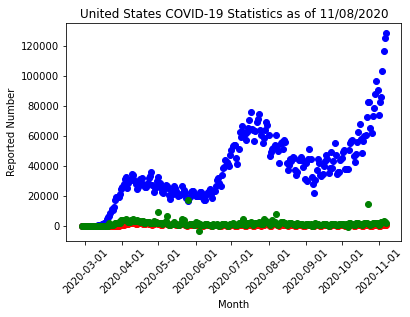

None


In [37]:
from datetime import datetime
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib 
from pprint import pprint

def visual1(filename):
    NSdf=pd.read_excel(filename,sheet_name="Sheet1")
    
    datelist=[]
    fdatelist=[]
    xticks=[]
    dtxticks=[]
    dtobjlist=[]
        
    for date in NSdf["dateChecked"]:
        datelist.append(date)
        
    for date in datelist:
        m=re.search(r"(.*?)T24:00:00Z",date) #removes hours and seconds
        f=m.group(1)
        fdatelist.append(f)
    
    for date in fdatelist:
        if date[-1]=="1" and date[-2]=="0":
            xticks.append(date)
            
    for date in xticks:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtxticks.append(dtobj)
        
    for date in fdatelist:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtobjlist.append(dtobj)
       
    dates = matplotlib.dates.date2num(dtobjlist)
    
    plt.plot_date(dates, NSdf['positiveIncrease'],color = 'blue',label = "# of Positive Cases per Day")
    plt.plot_date(dates, NSdf['deathIncrease'],color = 'red',label = "# of Deaths per Day")
    plt.plot_date(dates, NSdf['hospitalizedIncrease'],color = 'green',label = "# of Hospitalizations per Day")
    plt.xticks(dtxticks)
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Reported Number')
    plt.title('United States COVID-19 Statistics as of 11/08/2020')
    plt.show()
        
    
    pass
    
    
############ Function Call ############
pprint(visual1("NationalStats.xlsx"))

### Visualization 1 Explanation

This scatter plot is made up of 3 subplots. The blue scatterplot represents the national increase in number of COVID-19 cases every day since February 27th. From this plot, I can see that there are 3 main "waves" of virus: the first from February to mid April, the second from June to mid July, and the third from September to now. Each wave has significantly more cases per day than the last which makes sense because as more people become infected, the number of infections proportionally per day will rise. The most recent wave began at the same time schools reopened for the fall semester, and as of now the virus has yet to reach its peak. A major concern worldwide is whether or not the virus will mutate over time. This could drastically affect the current infection rates, death rates, and time spend in lockdown. However, the increase from one wave to the next does not rise abnormally in proportion to the previous wave. Therefore, I can conclude that the infection rate of the virus remains static. The red scatterplot represents the numbers of COVID-19 deaths per day and the green scatterplot represents the number of COVID-19 hospitalizations per day. However, since the number of deaths and hospitalizations remained virtually the same over the past 3 waves of the virus, this means that its lethality has not changed either. Because the infection rate, death rate, and hospitalization rate of COVID-19 has remained roughly the same over the last 9 months, I can conclude that virus has not mutated.

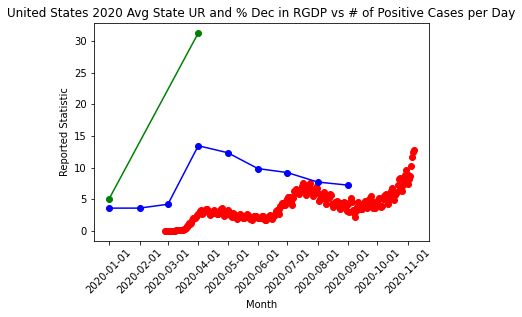

None


In [38]:
from datetime import datetime
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
from pprint import pprint

def visual2(filename1,filename2,filename3):
    NSdf=pd.read_excel(filename1,sheet_name="Sheet1")
    SRGDPdf=pd.read_excel(filename2,sheet_name="Sheet1")
    SURdf=pd.read_excel(filename3, sheet_name="Sheet1")
    
    monthur=[]
    urdates=['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01']
    dtur=[]
    qtravgrgdp=[]
    qtrdates=['2020-01-01','2020-04-01']
    dtqtr=[]
    datelist=[]
    fdatelist=[]
    xticks=['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01']
    dtxticks=[]
    dtobjlist=[]
        
    
    SURdf.drop(SURdf.index[[-1]],inplace=True) #removes Puerto Rico
    janur=round(SURdf["Jan."].mean(),2)
    monthur.append(janur)
    febur=round(SURdf["Feb."].mean(),2)
    monthur.append(febur)
    marur=round(SURdf["March"].mean(),2)
    monthur.append(marur)
    aprur=round(SURdf["April"].mean(),2)
    monthur.append(aprur)
    mayur=round(SURdf["May"].mean(),2)
    monthur.append(mayur)
    juneur=round(SURdf["June"].mean(),2)
    monthur.append(juneur)
    julyur=round(SURdf["July"].mean(),2)
    monthur.append(julyur)
    augur=round(SURdf["Aug."].mean(),2)
    monthur.append(augur)
    septur=round(SURdf["Sept."].mean(),2)
    monthur.append(septur)
    
    SRGDPdf.drop(SRGDPdf.index[[0,1,8,15,21,29,42,47,53]],inplace=True)
    srgdpavgQ1=round(-(SRGDPdf["2020Q1"].mean()),2)
    qtravgrgdp.append(srgdpavgQ1)
    srgdpavgQ2=round(-(SRGDPdf["2020Q2"].mean()),2)
    qtravgrgdp.append(srgdpavgQ2)
    
    NSdf['positiveIncrease']=round(NSdf['positiveIncrease']/10000,2)
    
    for date in NSdf["dateChecked"]:
        datelist.append(date)
        
    for date in datelist:
        m=re.search(r"(.*?)T24:00:00Z",date) #removes hours and seconds
        f=m.group(1)
        fdatelist.append(f)

    for date in xticks:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtxticks.append(dtobj)
    
    for date in urdates:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtur.append(dtobj)
    
    for date in qtrdates:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtqtr.append(dtobj)
    
    for date in fdatelist:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtobjlist.append(dtobj)
       
    dates = matplotlib.dates.date2num(dtobjlist)
    
   
    plt.plot_date(dates, NSdf['positiveIncrease'],color = 'red',label = "# of Positive Cases per Day(In tens of thousands of cases)")
    plt.plot_date(dtur, monthur,color = 'blue',label = "Avg State UR",linestyle='solid')
    plt.plot_date(dtqtr, qtravgrgdp,color = 'green',label = "Avg State % Dec in RGDP",linestyle='solid')
    plt.xticks(dtxticks)
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Reported Statistic')
    plt.title('United States 2020 Avg State UR and % Dec in RGDP vs # of Positive Cases per Day' )
    plt.show()
     
    pass


############ Function Call ############
pprint(visual2("NationalStats.xlsx","StateRGDP%Change.xlsx","StateUR%LF.xlsx"))

### Visualization 2 Explanation
This plot is made up of 3 subplots. The red scatter plot represents the national increase in number of COVID-19 cases every day since February 27th. The number of positive cases per day are scaled down by a factor of 10,000(in tens of thousands of cases per day) to offer a better visualization in comparison to the average state unemployment rate and % decrease in RGDP, both of which are percentages. The blue line graph represents the average state unemployment rate as a percentage of the civilian work force from Jan. 2020 to Sept. 2020. I calculated these values by averaging each column(month) in 'StateUR%LF.xlsx'. From this line graph, we can see that from Jan. to March, the average state UR remained consistently under 5% and then skyrocketed up to almost 15% at the beginning of April. This follows the same timeline as the 1st wave of COVID-19 and lockdowns(https://www.thetimesusa.com/2020/04/05/a-state-by-state-overview-of-the-coronavirus-lockdown/). Although the UR peaked in April and continued to slowly fall over the rest of the year, this is highly due to the end of most state lockdowns and the slow reopening of the economy. However, the economic effects of COVID-19 can still to be seen through the following months as UR rates remain well above 5% in contrast to the 3 months prior to the virus. The green line graph represents the quarterly percent decrease in average state RGDP from 2020 Q1 to 2020 Q2(Jan. through April). These values from found in the same way as the blue line graph from 'StateRGDP%Change.xlsx'. From this line graph, we can see that from 2019 Q4 to 2020 Q1, the average state RGDP decreased only by 5%. However, from Jan. to April, the average state RGDP % percent decrease rose by over 600 %. This follows the same timeline as the 1st wave of COVID 19(end of Feb. to April), and matches the historically high state average unemployment rate the same month. From analyzing all three plots, I can conclude that the increase average state unemployment rate and % decrease in RGDP were directly related to the timing of the introduction of the virus.


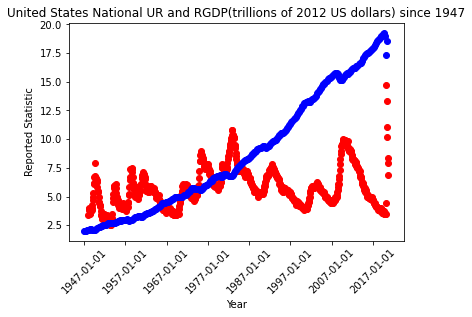

None


In [64]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pprint import pprint

def visual3(filename1,filename2):
    NRGDPdf=pd.read_excel(filename1,sheet_name="Sheet1")
    NURdf=pd.read_excel(filename2,sheet_name="Sheet1")
    
    RGDPdatelist=[]
    RGDPdt=[]
    URdatelist=[]
    URdt=[]
    xticks=[]
    dtxticks=[]
    dtobjlist=[]
    
    for date in NURdf['DATE']:
        URdatelist.append(date)
    
    for date in URdatelist:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        URdt.append(dtobj)
    
    NRGDPdf['RDGP(Billions of $)']=NRGDPdf['RDGP(Billions of $)']/1000 #converts to trillions of dollars
    
    for date in NRGDPdf['Date']:
        RGDPdatelist.append(date)
    
    for date in RGDPdatelist:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        RGDPdt.append(dtobj)
        
    for date in RGDPdatelist:
        if date=='1947-01-01' or date=='1957-01-01' or date=='1967-01-01' or date=='1977-01-01' or date=='1987-01-01' or date =='1997-01-01' or date=='2007-01-01' or date=='2017-01-01':
            xticks.append(date)
    
    for date in xticks:
        dtobj = datetime.strptime(date, '%Y-%m-%d')
        dtxticks.append(dtobj)
    
    plt.plot_date(URdt, NURdf['UNRATE'],color = 'red',label = "National UR")
    plt.plot_date(RGDPdt, NRGDPdf['RDGP(trillions of $)'],color = 'blue',label = "National RDGP")
    plt.xticks(dtxticks)
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Reported Statistic')
    plt.title('United States National UR and RGDP(trillions of 2012 US dollars) since 1947' )
    plt.show()
    
    pass


############ Function Call ############
pprint(visual3("NationalRGDP.xlsx","NationalUR%LF.xlsx"))

### Visualization 3 Explanation
This plot is made up of 2 subplots. The red scatter plot represents the national unemployment rate for every month since 1948. This plot supports insight 5 by providing a visual to show that the top 3 months with the highest unemployment rate in almost the last 75 years of U.S. history occurred during the first to second wave to COVID-19 and when most states enforced lockdown. We can see this by comparing these months to trends in visualization 1 and 2 and from https://www.thetimesusa.com/2020/04/05/a-state-by-state-overview-of-the-coronavirus-lockdown/. The blue scatter plot represents the national RGDP in trillions of dollars each quarter since 1947. The RGDP is scaled down by a factor of 1000(in trillions of 2012 US dollars) from billions of dollars to offer a better visualization in comparison to the national UR which is a percentage. This plot supports insight 4 by providing a visual to show that the largest decrease in RGDP occurred from 2020 Q1 to 2020 Q2. Visualization 2 also supports this visualization and insight 4 as the average state RGDP % percent decrease rose by over 600 % in conjunction with this statistic. From this visualization and insight 4 and 5, I can conclude that COVID-19 resulted in the highest unemployment rates and  decrease in RGDP on both a state and national level in almost the last 75 years.

## Summary Files

In [71]:
from pprint import pprint

def summary1(i3):
    i3.to_excel(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\Summary1(Insight 3).xlsx',index=False,header=True) #writes df to excel file

    pass


############ Function Call ############
pprint(summary1(i3=insight3("NationalStats.xlsx")))

None


In [119]:
import pandas as pd
from pprint import pprint
def summary2(filename):
    ACdf=pd.read_excel(filename,sheet_name="AllCauses")
    ECdf=pd.read_excel(filename,sheet_name="ExceptCOVID")
    
    statelist=[]
    ACLow=[]
    ACHigh=[]
    ECLow=[]
    ECHigh=[]
    
    for state in ACdf['State']:
        if state!="United States" and (state not in statelist):
            statelist.append(state)
    
    for val in ACdf["Total Excess Lower Estimate in 2020"]:
        if val not in ACLow:
            ACLow.append(val)
    ACLow.remove(231952)
    
    
    for val in ACdf["Total Excess Higher Estimate in 2020"]:
        if val not in ACHigh:
            ACHigh.append(val)
    ACHigh.remove(311882)
    ACHigh.insert(37,2097)
    
    for val in ECdf["Total Excess Lower Estimate in 2020"]:
        if val not in ECLow:
            ECLow.append(val)
    ECLow.remove(33782)
    ECLow.insert(35,9)
    ECLow.insert(47,89)
    ECLow.insert(51,34)
        
    for val in ECdf["Total Excess Higher Estimate in 2020"]:
        if val not in ECHigh:
            ECHigh.append(val)
    ECHigh.remove(108102)
    
    CRDLow=[a-e for a,e in zip(ACLow,ECLow)]    
    CRDHigh=[a-e for a,e in zip(ACHigh,ECHigh)]
    
            
    d={"State":statelist,"Lower Estimate for All Causes":ACLow, "Higher Estimate for All Causes":ACHigh, "Lower Estimate for Except COVID":ECLow, "Higher Estimate for Except COVID":ECHigh,"Lower Estimate for Excess COVID":CRDLow, "Higher Estimate for Excess COVID":CRDHigh}
    newdf=pd.DataFrame(d)
    newdf.to_excel(r'C:\Users\wkimm\OneDrive\Documents\GT Fall 2020\CS 2316\Final Project\Summary2(Insight 1).xlsx',index=False,header=True) #writes df to excel file

    pass

    
############ Function Call ############
pprint(summary2("ExcessDeaths.xlsx"))

None


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:

 
*   https://www.thetimesusa.com/2020/04/05/a-state-by-state-overview-of-the-coronavirus-lockdown/ 





# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://bluejeans.com/s/1gH44dr6nin/


Make sure the video sharing permissions are accessible for anyone with the provided link.